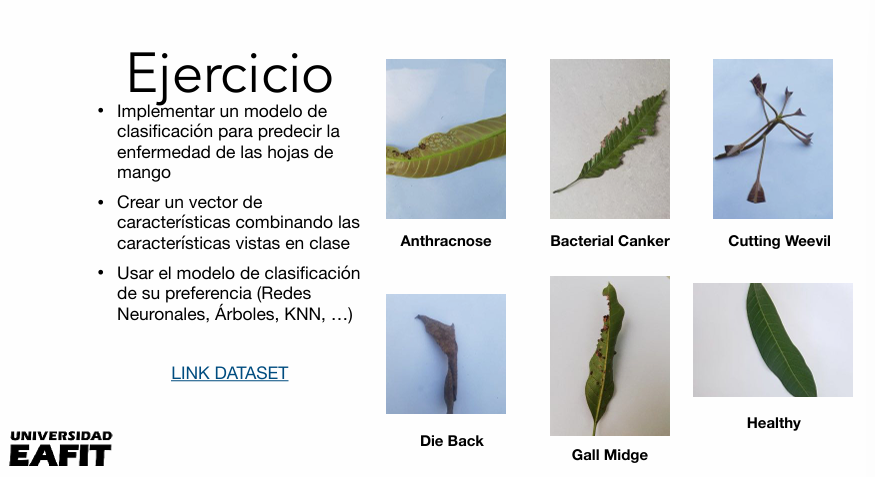

In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder

In [2]:
# Ruta a la carpeta con las imágenes
image_folder = "/content/drive/MyDrive/Vision/Ejercicios_clase/mango_leaf_disease"
# Listas para almacenar las características y las etiquetas
features = []
labels = []

In [3]:
# Parámetros HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

In [4]:
# Leer imágenes y extraer características
for category in os.listdir(image_folder):
    category_path = os.path.join(image_folder, category)
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)

            # Check if the file is a valid image file and not a hidden file
            if image_file.startswith('.') or not (image_file.endswith('.jpg') or image_file.endswith('.png') or image_file.endswith('.jpeg')):
                continue

            image = cv2.imread(image_path)

            # Check if image was loaded successfully
            if image is None:
                print(f"Failed to load image: {image_path}")
                continue

            # Redimensionar la imagen para que todas tengan el mismo tamaño
            image = cv2.resize(image, (128, 128))

            # Convertir la imagen a escala de grises
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Extraer características HOG
            hog_features = hog(gray_image, **hog_params)

            # Añadir las características y etiquetas
            features.append(hog_features)
            labels.append(category)

In [5]:
# Convertir a arrays de numpy
features = np.array(features)
labels = np.array(labels)

# Codificar las etiquetas
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Definir y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.731585518102372
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       123
           1       0.74      0.95      0.84        88
           2       0.93      0.99      0.96        99
           3       0.91      0.87      0.89       109
           4       0.68      0.69      0.68       109
           5       0.57      0.63      0.60        90
           6       0.59      0.81      0.69        85
           7       0.76      0.42      0.54        98

    accuracy                           0.73       801
   macro avg       0.73      0.74      0.73       801
weighted avg       0.74      0.73      0.72       801

